<a href="https://colab.research.google.com/github/ish7161/Ishika_INBT03235_August2023/blob/main/Task%202/CIFAR-10%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the  necessary libraries

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications import VGG19
import os
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.image as mpimg
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import itertools
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau

%matplotlib inline

Loading the dataset and dividing it into train, validation and test datasets

In [ ]:
dataset= cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
(x_train, y_train), (x_test, y_test) = dataset
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

Printing the dimensions of the dataset

In [ ]:
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


Converting class vectors to binary class matrices . This is called One Hot Encoding

In [ ]:
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

Setting the cnn model hyperparameters and other global parameters

In [ ]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = False

## Defining the cnn model

In [ ]:
cnn_model = Sequential()
# network is learning 32 convolutional filters
cnn_model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
cnn_model.add(Activation('relu'))
cnn_model.add(Conv2D(32, (3, 3)))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))
# network is learning 64 convolutional filters
cnn_model.add(Conv2D(64, (3, 3), padding='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(Conv2D(64, (3, 3)))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

# A dense network with 512 units and relu activation
cnn_model.add(Flatten())
cnn_model.add(Dense(512 ))
cnn_model.add(Flatten())
cnn_model.add(Dense(512))
cnn_model.add(Activation('relu'))
cnn_model.add(Dropout(0.5))
# a softmax classifier
cnn_model.add(Dense(num_classes))
cnn_model.add(Activation('softmax'))

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                      

 Initiating RMSprop optimizer

In [ ]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

Training the model using RMSprop

In [ ]:
cnn_model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])

Score trained model



In [ ]:
scores = cnn_model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


313/313 [==============================] - 28s 87ms/step - loss: 15.9666 - accuracy: 0.0975
Test loss: 15.96660327911377
Test accuracy: 0.09749999642372131


Confusion Matrix

In [ ]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):

    if not ax:
        ax = plt.gca()

    im = ax.imshow(data, **kwargs)

    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")


    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))

    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

    return im, cbar
def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

313/313 [==============================] - 14s 43ms/step


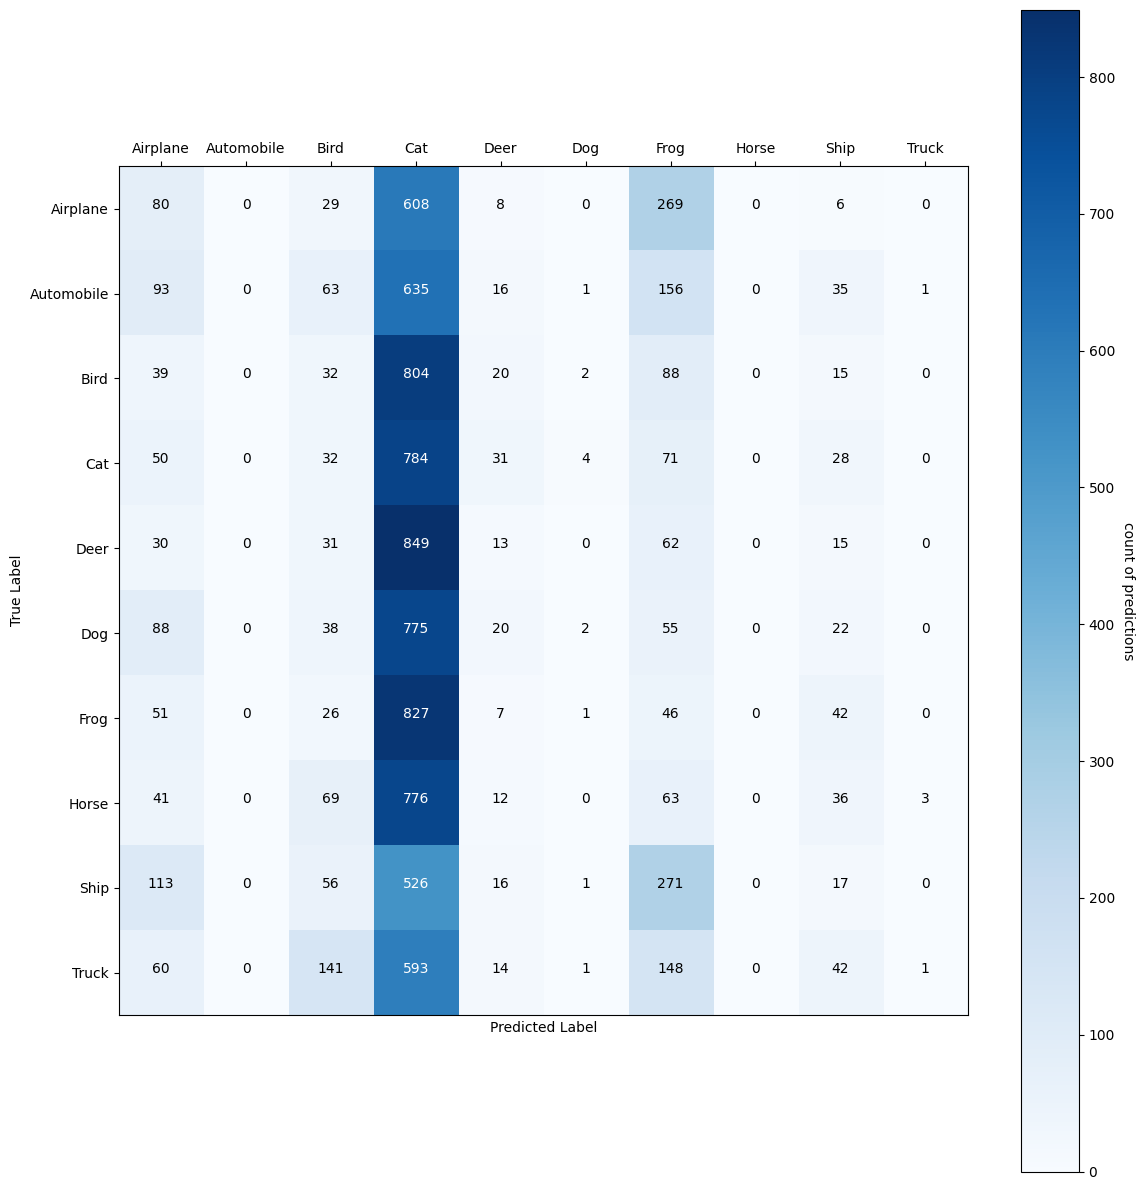

In [ ]:
pred = cnn_model.predict(x_test)
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


Y_pred_classes = np.argmax(pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes)
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()


Classification report

In [ ]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.12      0.08      0.10      1000
           1       0.00      0.00      0.00      1000
           2       0.06      0.03      0.04      1000
           3       0.11      0.78      0.19      1000
           4       0.08      0.01      0.02      1000
           5       0.17      0.00      0.00      1000
           6       0.04      0.05      0.04      1000
           7       0.00      0.00      0.00      1000
           8       0.07      0.02      0.03      1000
           9       0.20      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.08      0.10      0.04     10000
weighted avg       0.08      0.10      0.04     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Checking the predictions

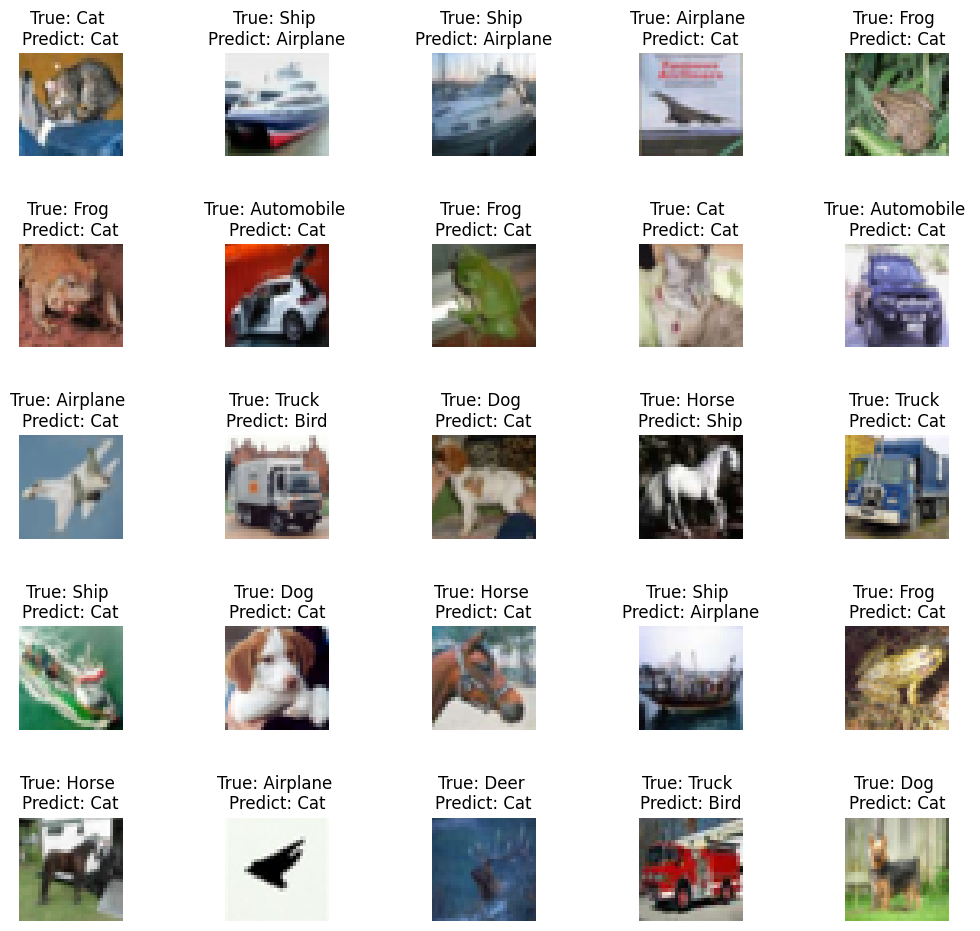

In [ ]:
R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[Y_true[i]], labels[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)


Checking the wrong predictions

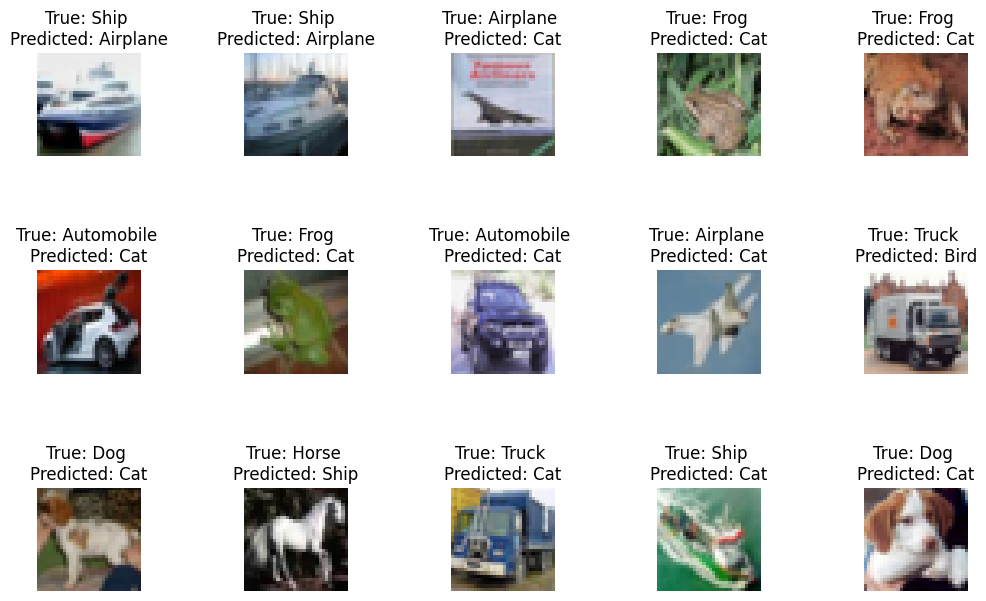

In [ ]:
R = 3
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,8))
axes = axes.ravel()

misclassified_idx = np.where(Y_pred_classes != Y_true)[0]
for i in np.arange(0, R*C):
    axes[i].imshow(x_test[misclassified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[Y_true[misclassified_idx[i]]],labels[Y_pred_classes[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

Evaluating for overfitting

In [ ]:
history = cnn_model.fit(x_train, y_train, validation_split=0.3, epochs=10, batch_size=1000, verbose=1, shuffle = True)

Epoch 1/10
25/25 [==============================] - 91s 4s/step - loss: 16.6380 - accuracy: 0.1203 - val_loss: 2.3320 - val_accuracy: 0.1970
Epoch 2/10
25/25 [==============================] - 84s 3s/step - loss: 3.5904 - accuracy: 0.1318 - val_loss: 2.2641 - val_accuracy: 0.1622
Epoch 3/10
25/25 [==============================] - 84s 3s/step - loss: 2.3522 - accuracy: 0.1344 - val_loss: 2.2500 - val_accuracy: 0.1692
Epoch 4/10
25/25 [==============================] - 83s 3s/step - loss: 2.2686 - accuracy: 0.1506 - val_loss: 2.1817 - val_accuracy: 0.1821
Epoch 5/10
25/25 [==============================] - 83s 3s/step - loss: 2.2164 - accuracy: 0.1729 - val_loss: 2.0656 - val_accuracy: 0.2367
Epoch 6/10
25/25 [==============================] - 86s 3s/step - loss: 2.1552 - accuracy: 0.2028 - val_loss: 2.0095 - val_accuracy: 0.2890
Epoch 7/10
25/25 [==============================] - 86s 3s/step - loss: 2.0662 - accuracy: 0.2372 - val_loss: 1.9307 - val_accuracy: 0.3213
Epoch 8/10
25/25 [=

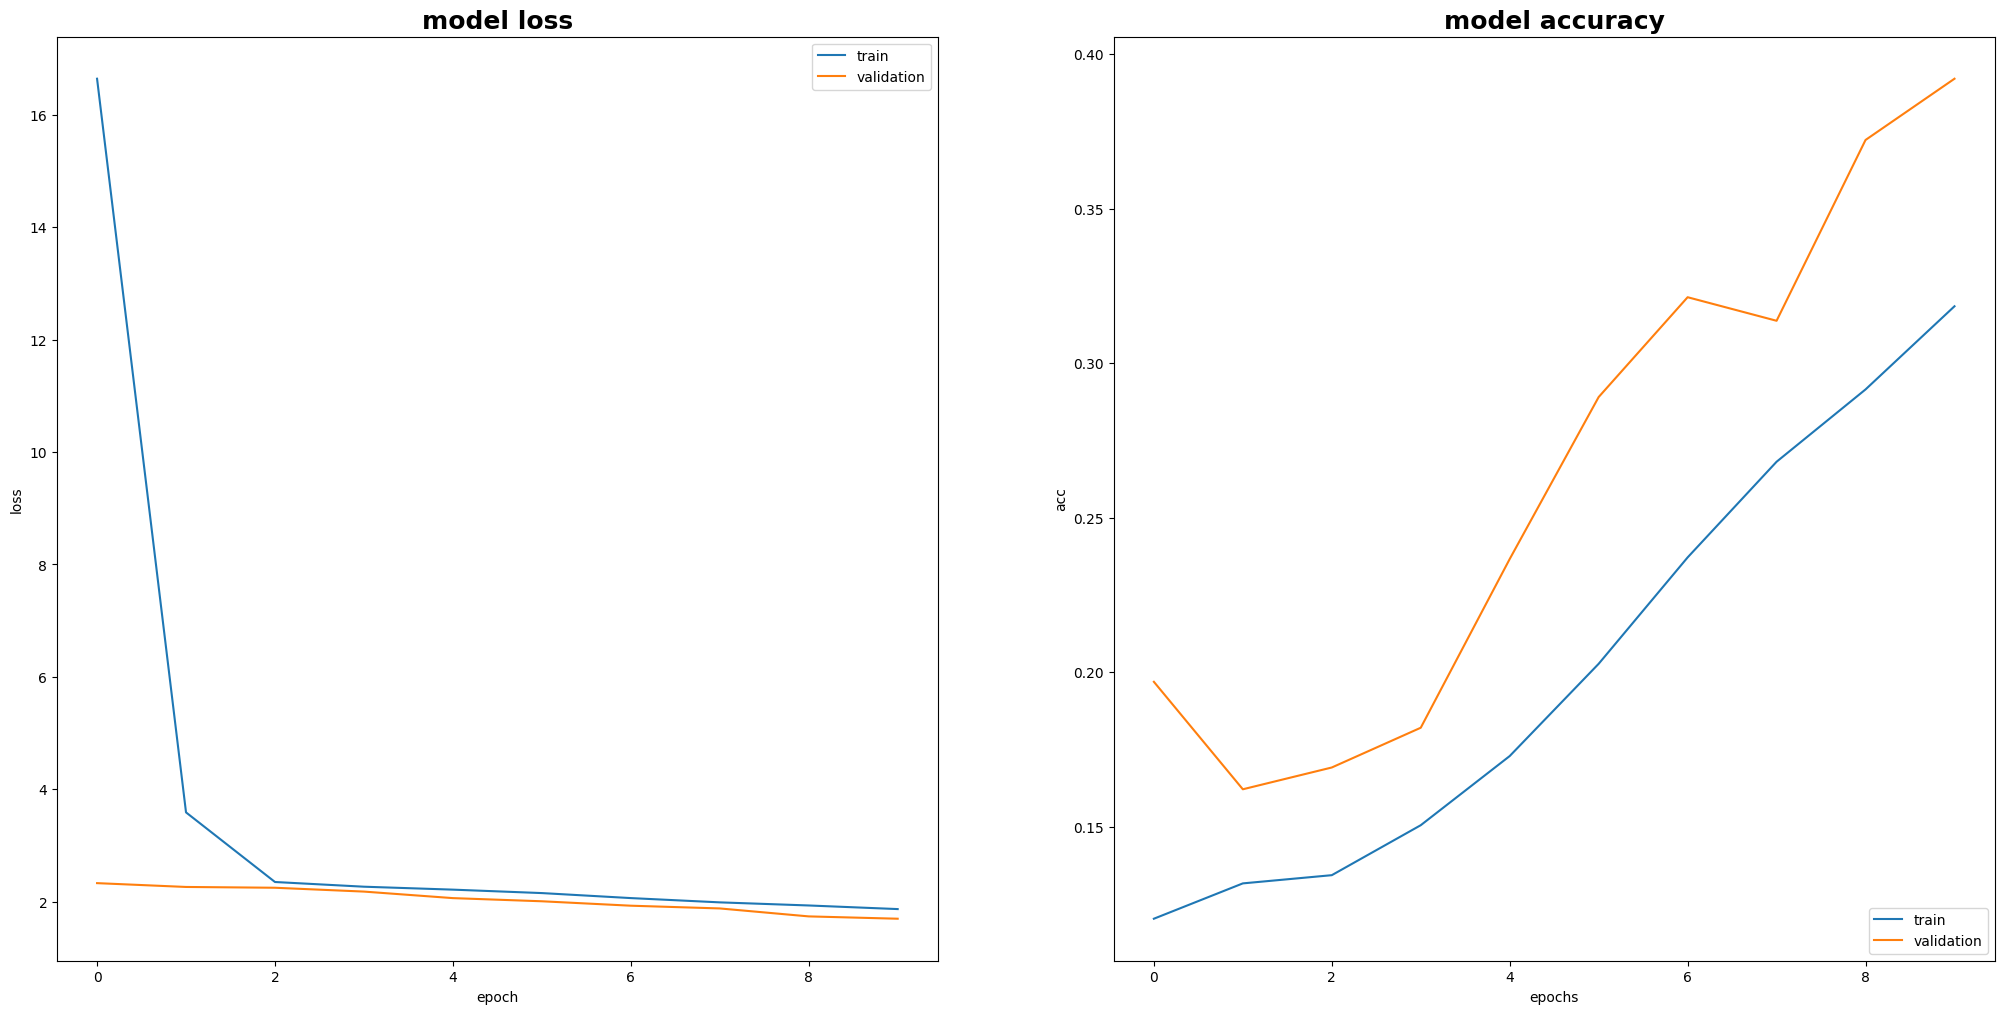

In [ ]:
plt.figure(figsize = (25, 12))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss', fontsize = 18, fontweight="bold")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right', prop={'size': 10})

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy', fontsize = 18, fontweight="bold")
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['train', 'validation'], loc='lower right', prop={'size': 10})

## Transfer Learning model - VGG 19

In [ ]:

from keras import Sequential
from keras.applications import VGG19
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.utils import to_categorical

Data Augmentation

In [ ]:
train_generator = ImageDataGenerator(rotation_range=2,horizontal_flip=True,zoom_range=.1 )
val_generator = ImageDataGenerator(rotation_range=2,horizontal_flip=True,zoom_range=.1)
test_generator = ImageDataGenerator( rotation_range=2, horizontal_flip= True, zoom_range=.1)

Fit the augmentation method to the data

learning rate annealer

In [ ]:
rr= ReduceLROnPlateau(monitor='val_acc', #Metric to be measured
                      factor=.01, #Factor by which learning rate will be reduced
                       patience=3,  #No. of epochs after which if there is no improvement in the val_acc, the learning rate is reduced
                       min_lr=1e-5)

building the model

In [ ]:
base_model = VGG19(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=y_train.shape[1])

80134624/80134624 [==============================] - 0s 0us/step


adding final layers to the base model

In [ ]:
model= Sequential()
model.add(base_model) #Adds the base model (in this case vgg19 to model_1)
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
Total params: 20,024,384
Trainable params: 20,024,384
Non-trainable params: 0
_________________________________________________________________


adding dense layers along with activation and batch normalization

In [ ]:
model.add(Dense(1024,activation=('relu'),input_dim=512))
model.add(Dense(512,activation=('relu')))
model.add(Dense(256,activation=('relu')))
#model.add(Dropout(.3))#Adding a dropout layer that will randomly drop 30% of the weights
model.add(Dense(128,activation=('relu')))
#model.add(Dropout(.2))
model.add(Dense(10,activation=('softmax'))) #This is the classification layer

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 10)                1

In [ ]:
batch_size= 100
epochs=5

In [ ]:
learn_rate=.001

sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


COMPILING THE MODEL

In [ ]:
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

Model Training

In [ ]:
history=model.fit(train_generator.flow(x_train,y_train,batch_size=batch_size), epochs=epochs,steps_per_epoch=x_train.shape[0]//batch_size,validation_data=val_generator.flow(x_val,y_val,batch_size=batch_size),validation_steps=250,verbose=1)

Epoch 1/5
350/350 [==============================] - ETA: 0s - loss: 1.7760 - accuracy: 0.3277 

350/350 [==============================] - 4840s 14s/step - loss: 1.7760 - accuracy: 0.3277 - val_loss: 1.2657 - val_accuracy: 0.5355
Epoch 2/5
350/350 [==============================] - 4623s 13s/step - loss: 1.0277 - accuracy: 0.6398
Epoch 3/5
350/350 [==============================] - 4583s 13s/step - loss: 0.7706 - accuracy: 0.7367
Epoch 4/5
350/350 [==============================] - 4620s 13s/step - loss: 0.6436 - accuracy: 0.7816
Epoch 5/5
350/350 [==============================] - 4797s 14s/step - loss: 0.5662 - accuracy: 0.8058


Confusion Matrix

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,normalize=False,title=None,cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)


In [ ]:
y_pred=np.argmax(model.predict(x_test), axis=-1)
y_true=np.argmax(y_test,axis=1)

#Compute the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

313/313 [==============================] - 101s 320ms/step


In [ ]:
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Normalized confusion matrix


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

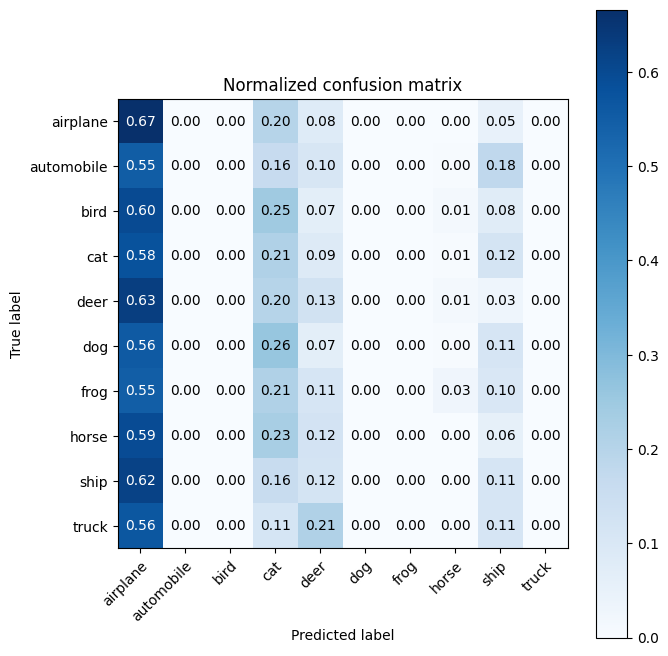

In [ ]:
plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True,title='Normalized confusion matrix')
# plt.show()